In [1]:
# import general libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats

In [2]:
# import dataset
df = pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

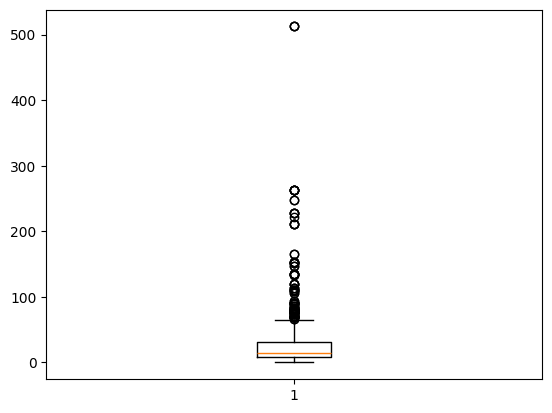

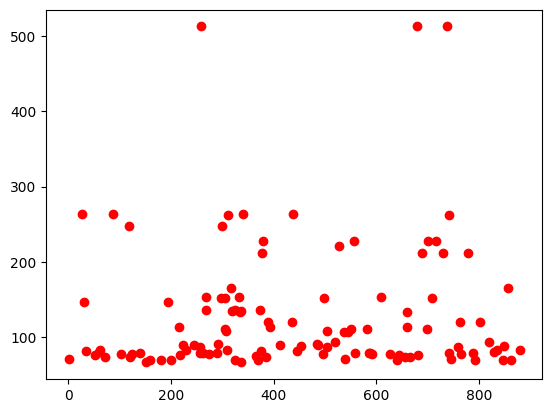

In [4]:
# Check for outliers
# Calculate the IQR for a specific column in the dataset
column_name = "Fare"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1


# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]


print(outliers)


# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

In [5]:
# Check for inconsistent data format

# Check the data types of the columns in the dataset
print(df.dtypes)

# Convert specific columns to a specific data type if necessary
df['Fare'] = df['Fare'].astype(float)

# Define the subset of columns to check for non-numeric characters
columns_to_check = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Check if any columns contain non-numeric characters
for column_name in columns_to_check:
    for value in df[column_name]:
        try:
            float(value)
        except ValueError:
            print(f"Column {column_name} contains non-numeric value: {value}")


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Check for duplicates in the dataset
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop the duplicate rows in the dataset
df = df.drop_duplicates()

Number of duplicate rows: 0


In [10]:
# Check for invalid data


# Check for invalid data in the 'age' column
invalid_age_rows = df[(df['Age'] < 0) | (df['Age'] > 100)]
if not invalid_age_rows.empty:
    print("Invalid values found in the 'age' column:")
    print(invalid_age_rows[['Age']])

# Check for invalid data in the 'fare' column
invalid_fare_rows = df[(df['Fare'] < 0) | (df['Fare'] > 500)]
if not invalid_fare_rows.empty:
    print("Invalid values found in the 'fare' column:")
    print(invalid_fare_rows[['Fare']])

# Check for invalid data in the 'embarked' column
valid_values = ['C', 'Q', 'S']
invalid_embarked_rows = df[~df['Embarked'].isin(valid_values)]
print(invalid_embarked_rows)
if not invalid_embarked_rows.empty:
    print("Invalid values found in the 'embarked' column:")
    print(invalid_embarked_rows[['Embarked']])

# Check for invalid data in the 'sex' column
valid_values = ['male', 'female']
invalid_sex_rows = df[~df['Sex'].isin(valid_values)]
if not invalid_sex_rows.empty:
    print("Invalid values found in the 'sex' column:")
    print(invalid_sex_rows.Sex)


Invalid values found in the 'fare' column:
         Fare
258  512.3292
679  512.3292
737  512.3292
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  
Invalid values found in the 'embarked' column:
    Embarked
61       NaN
829      NaN


In [ ]:
# Handle missing values

# Option 1: Drop missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with mean/median/mode
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [11]:
# Check for outliers
print(df)
# Option 1: Z-Score
z = np.abs(scipy.stats.zscore(df["Fare"]))
print(z)

# Option 2: Interquartile Range (IQR)
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(df[(df["Fare"] < lower) | (df["Fare"] > upper)])

# Handle outliers
# Option 1: Drop outliers
df = df[(z < 3)]

# Option 2: Replace outliers with mean/median/mode
df["Fare"][df["Fare"] < lower] = lower
df["Fare"][df["Fare"] > upper] = upper

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

C:\Users\varun\AppData\Local\Temp\ipykernel_37848\1180022209.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Fare"][df["Fare"] < lower] = lower
C:\Users\varun\AppData\Local\Temp\ipykernel_37848\1180022209.py:21: FutureWarning: Chain

In [13]:
# Check for inconsistent data format
# Option 1: Check data type of columns
print(df.dtypes)

# Option 2: Check unique values of columns
print(df["Embarked"].unique())

# Handle inconsistent data format
# Option 1: Convert data type of columns
df["PassengerId"] = df["PassengerId"].astype(str)

# Option 2: Replace inconsistent values with most frequent value
df["Embarked"].replace({"C": "S"}, inplace=True)
help(df.replace)

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['S' 'Q' nan]
Help on method replace in module pandas.core.generic:

replace(to_replace=None, value=<no_default>, *, inplace: 'bool_t' = False, limit: 'int | None' = None, regex: 'bool_t' = False, method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>) -> 'Self | None' method of pandas.core.frame.DataFrame instance
    Replace values given in `to_replace` with `value`.

    Values of the Series/DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.

    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        H

C:\Users\varun\AppData\Local\Temp\ipykernel_37848\3384726787.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].replace({"C": "S"}, inplace=True)
